# TAREA FINAL: VOLTAJE EN CASA
### Herramientas computacionales para la física
**By:** *Bryan Alejandro Berbesi C. - 2210701*  **&**
*Jose Mario Castillo M. - 2210705* **&** *Sergio Andrés Zambrano - 2180560*

In [1]:
#Antes de comenzar aunque tecicamente ya hemos comenzado
#Importamos las bibliotecas que utilizaremos durante la realización del codigo

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sci
from scipy.optimize import curve_fit
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl

## Punto 1
Debe leer los cuatro archivos. Todos los archivos tienen la misma marca de tiempo.

1. Para leer los archivos **.csv** que contienen los datos que analizaremos. Usaremos el comando **pandas.read_csv('{nombre y ubicación del archivo}')**

In [2]:
Global_reactive_power=pd.read_csv('Tarea_final/Global_reactive_power.csv')
Global_reactive_power

,Datetime,Global_reactive_power
0,2010-01-01 00:00:00,0.236
1,2010-01-01 00:01:00,0.234
2,2010-01-01 00:02:00,0.234
3,2010-01-01 00:03:00,0.186
4,2010-01-01 00:04:00,0.102
...,...,...
457390,2010-11-26 20:58:00,0.000
457391,2010-11-26 20:59:00,0.000
457392,2010-11-26 21:00:00,0.000
457393,2010-11-26 21:01:00,0.000


In [3]:
Global_active_power=pd.read_csv('Tarea_final/Global_active_power.csv')
Global_active_power

,Datetime,Global_active_power
0,2010-01-01 00:00:00,1.790
1,2010-01-01 00:01:00,1.780
2,2010-01-01 00:02:00,1.780
3,2010-01-01 00:03:00,1.746
4,2010-01-01 00:04:00,1.686
...,...,...
457390,2010-11-26 20:58:00,0.946
457391,2010-11-26 20:59:00,0.944
457392,2010-11-26 21:00:00,0.938
457393,2010-11-26 21:01:00,0.934


In [4]:
Global_intensity=pd.read_csv('Tarea_final/Global_intensity.csv')
Global_intensity

,Datetime,Global_intensity
0,2010-01-01 00:00:00,7.4
1,2010-01-01 00:01:00,7.4
2,2010-01-01 00:02:00,7.4
3,2010-01-01 00:03:00,7.2
4,2010-01-01 00:04:00,7.0
...,...,...
457390,2010-11-26 20:58:00,4.0
457391,2010-11-26 20:59:00,4.0
457392,2010-11-26 21:00:00,3.8
457393,2010-11-26 21:01:00,3.8


In [5]:
Voltage=pd.read_csv('Tarea_final/Voltage.csv')
Voltage

,Datetime,Voltage
0,2010-01-01 00:00:00,240.65
1,2010-01-01 00:01:00,240.07
2,2010-01-01 00:02:00,240.15
3,2010-01-01 00:03:00,240.26
4,2010-01-01 00:04:00,240.12
...,...,...
457390,2010-11-26 20:58:00,240.43
457391,2010-11-26 20:59:00,240.00
457392,2010-11-26 21:00:00,239.82
457393,2010-11-26 21:01:00,239.70


## Punto 2
Deberá juntar/mezclar/concatenar los cuatro archivos para obtener un sólo archivo.

In [6]:
#Unimos los dataframes con el objetivo de tener toda la información en uno solo

data_second=pd.merge(pd.merge(Global_reactive_power, Global_active_power, on=["Datetime"]),
                pd.merge(Global_intensity, Voltage, on=["Datetime"]),
                on=["Datetime"])

In [7]:
data_second

,Datetime,Global_reactive_power,Global_active_power,Global_intensity,Voltage
0,2010-01-01 00:00:00,0.236,1.790,7.4,240.65
1,2010-01-01 00:01:00,0.234,1.780,7.4,240.07
2,2010-01-01 00:02:00,0.234,1.780,7.4,240.15
3,2010-01-01 00:03:00,0.186,1.746,7.2,240.26
4,2010-01-01 00:04:00,0.102,1.686,7.0,240.12
...,...,...,...,...,...
457390,2010-11-26 20:58:00,0.000,0.946,4.0,240.43
457391,2010-11-26 20:59:00,0.000,0.944,4.0,240.00
457392,2010-11-26 21:00:00,0.000,0.938,3.8,239.82
457393,2010-11-26 21:01:00,0.000,0.934,3.8,239.70


Antes de realizar el resample, procedemos a cambiar los datos a vatios/hora.

In [8]:
data_second['Global_reactive_power']=round(data_second['Global_reactive_power']*1000/60,3)
data_second['Global_active_power']=round(data_second['Global_active_power']*1000/60,3)

In [9]:
data_second

,Datetime,Global_reactive_power,Global_active_power,Global_intensity,Voltage
0,2010-01-01 00:00:00,3.933,29.833,7.4,240.65
1,2010-01-01 00:01:00,3.900,29.667,7.4,240.07
2,2010-01-01 00:02:00,3.900,29.667,7.4,240.15
3,2010-01-01 00:03:00,3.100,29.100,7.2,240.26
4,2010-01-01 00:04:00,1.700,28.100,7.0,240.12
...,...,...,...,...,...
457390,2010-11-26 20:58:00,0.000,15.767,4.0,240.43
457391,2010-11-26 20:59:00,0.000,15.733,4.0,240.00
457392,2010-11-26 21:00:00,0.000,15.633,3.8,239.82
457393,2010-11-26 21:01:00,0.000,15.567,3.8,239.70


## Punto 3
Una vez que tenga un sólo archivo con la información de las cuatro columnas **\Global active power",
\Global reactive power", \Global intensity" y \Voltaje"**, con la correspondiente columna de **\Datetime"**, verá que los datos tienen escalas de minutos. Seguidamente queremos hacer un ***resample*** de los datos para tenerlos ahora en escalas de días (con promedios diarios, con lo que obtendrá un nuevo conjunto de datos que tendrá no más de 365 lineas), y también otro ***resample*** de los datos para tenerlos ahora en escalas de meses (con promedios mensuales, con lo que obtendrá un nuevo conjunto de datos que tendrá no más de 12 lineas).

Para ello vamos a utilizar el comando: 

### **.resample('argument').mean().dropna()**

donde ***.resample*** se usa para cambiar los intervalos de tiempo (por ejemplo de segundos a horas), ***.mean*** se usa para hallar los promedios de los datos de dichos intervalos y ***.dropna** se usa para eliminar los NaNs que se encuentren en los dataframes

In [10]:
#Usaremos el comando pd.to_datetime para asignar 
#Datetime que está como una lista de argumento
#y realizar el resample

data_second['Datetime'] = pd.to_datetime(data_second['Datetime'])
data_second=data_second.set_index('Datetime')

#Usaremos el argumento D
#para pasar la data original en segundos(s) a días(D)

data_day=data_second.resample('D').mean().dropna()
data_day

,Global_reactive_power,Global_active_power,Global_intensity,Voltage
Datetime,,,,
2010-01-01,1.913614,14.169592,3.537083,242.565722
2010-01-02,1.444256,19.603921,4.857778,243.631743
2010-01-03,1.505511,15.031576,3.757778,241.822778
2010-01-04,1.672035,19.530563,4.879028,241.754160
2010-01-05,2.228298,15.279607,3.929861,240.647167
...,...,...,...,...
2010-12-07,3.309176,12.842301,3.397222,240.218646
2010-12-08,1.957152,6.130765,1.623750,240.794931
2010-12-09,2.330551,18.658474,4.755694,241.619722


In [11]:
#A continuación usaremos el argumento M
#para pasar la data original en segundos(s) a meses(M)
data_month=data_second.resample('M').mean().dropna()  
data_month

,Global_reactive_power,Global_active_power,Global_intensity,Voltage
Datetime,,,,
2010-01-31,2.086377,21.677334,5.430332,242.338522
2010-02-28,1.824457,19.292318,4.836624,242.002101
2010-03-31,2.272798,19.500255,4.920399,241.475284
2010-04-30,2.159279,17.272230,4.363496,241.442527
2010-05-31,2.120356,17.932618,4.551504,241.296151
2010-06-30,2.425415,16.255105,4.170282,240.888985
2010-07-31,2.301545,12.982458,3.337202,240.965167
2010-08-31,2.180260,15.490872,3.954423,241.422944
2010-09-30,2.128339,16.625685,4.223837,241.267517


Función para determinar errores

In [69]:
def get_fit(func,xdata,ydata,r):
    popt, pcov = curve_fit(func, xdata, ydata)
    popt, pcov = np.around(popt,r), np.around(np.sqrt(np.diag(pcov)),r)
    E=np.sqrt(np.mean((ydata-func(xdata, *popt))**2))
    print("Coeficients are : {}".format(popt))
    print("Sigma_Coeficients are : {}".format(pcov))
    print("Error on fit is ={}".format(E))
    return

## Punto 4
Por último, queremos evaluar un modelo sencillo de regresión para tener una relación entre
**\Global active power"** y **\Global intensity"** y/o **\Voltaje"**, algo como:

Relación 1: **Global active power = A1(Global intensity) + B1;**

Relación 2: **Global active power = A2(Voltaje) + B2;**

Relación 3: **Global active power = A31(Global intensity) + A32(Voltaje) + B3:**

### $\clubsuit$ Relation 1: Active Power and Intensity

Graficamos ambas variables para ver cómo se comportan.

Primero observaremos el comportamiento de ambas variables para nuestra data original cuyo intervalo de tiempo es en segundos

In [12]:
#Utilizaremos este "ciclo for" para pasar los datos del data frame a valores númericos
#Ya que, hay algunos datos que la biblioteca Pandas no toma al momento de hacer el resample

for i in ["Global_active_power","Global_reactive_power","Voltage","Global_intensity"]:
    data_second[i]=pd.to_numeric(data_second[i])
    
#De esta forma nos haceguramos que Pandas tomará todos los datos del data frame    

In [13]:
#Definimos la ecuación de nuestra relación 1, la cual nos servirá
#a su vez para la relación 2.

def relation1(x, A, B):
    active_power_r1 = A*x + B
    return active_power_r1

#Realizamos el ajuste polinomial con la función curve_fit

values1_s,covar1_s=curve_fit(relation1, data_second['Global_intensity'], data_second['Global_active_power'])
A1_s=values1_s[0]
B1_s=values1_s[1]

Coeficients are : [ 3.9671  -0.08303]
Sigma_Coeficients are : [0.00031 0.00184]
Error on fit is =0.8209161928072423


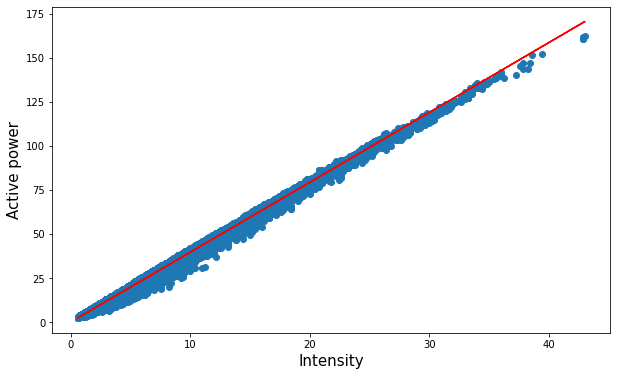

In [89]:
plt.figure(figsize=(10,6))
plt.plot(data_second["Global_intensity"],relation1(data_second['Global_intensity'],A1_s,B1_s), '-r')
plt.scatter(data_second["Global_intensity"],data_second["Global_active_power"])
plt.xlabel(r'Intensity', size='15')
plt.ylabel(r'Active power', size='15')
get_fit(relation1,data_second["Global_intensity"],data_second["Global_active_power"],5)
plt.show()

In [71]:
get_fit(relation1,data_day["Global_intensity"],data_day["Global_active_power"],1)

Coeficients are : [ 4.1 -0.5]
Sigma_Coeficients are : [0. 0.]
Error on fit is =0.3179963324045638


A continuación observaremos el comportamiento de las variables para la data en días

In [16]:
for i in ["Global_active_power","Global_reactive_power","Voltage","Global_intensity"]:
    data_day[i]=pd.to_numeric(data_day[i])

In [17]:
values1_d,covar1_d=curve_fit(relation1, data_day["Global_intensity"],data_day["Global_active_power"])
A1_d=values1_d[0]
B1_d=values1_d[1]

Coeficients are : [ 4.05097 -0.45887]
Sigma_Coeficients are : [0.01001 0.04704]
Error on fit is =0.25374588585086955


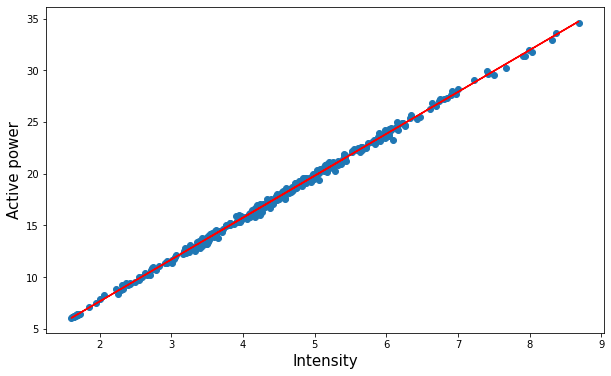

In [88]:
plt.figure(figsize=(10,6))
plt.scatter(data_day["Global_intensity"],data_day["Global_active_power"])
plt.plot(data_day["Global_intensity"],relation1(data_day['Global_intensity'],A1_d,B1_d), '-r')
plt.xlabel(r'Intensity', size='15')
plt.ylabel(r'Active power', size='15')
get_fit(relation1,data_day["Global_intensity"],data_day["Global_active_power"],5)
plt.show()

Por ultimo observaremos el comportamiento de las variables para la data en en meses

In [19]:
for i in ["Global_active_power","Global_reactive_power","Voltage","Global_intensity"]:
    data_month[i]=pd.to_numeric(data_month[i])

In [20]:
values1_m,covar1_m=curve_fit(relation1, data_month['Global_intensity'], data_month['Global_active_power'])
A1_m=values1_m[0]
B1_m=values1_m[1]

Coeficients are : [ 4.17381 -1.0112 ]
Sigma_Coeficients are : [0.0426  0.19247]
Error on fit is =0.06875914883774183


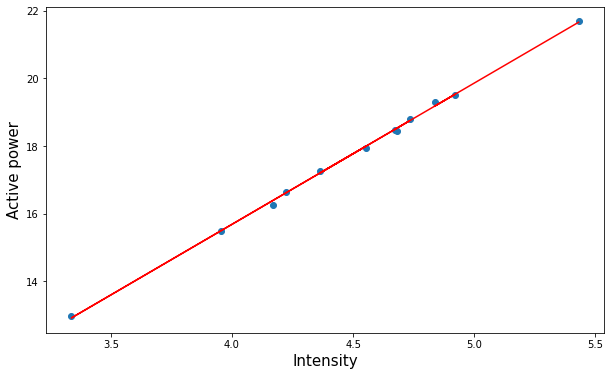

In [87]:
plt.figure(figsize=(10,6))
plt.scatter(data_month["Global_intensity"],data_month["Global_active_power"])
plt.plot(data_month["Global_intensity"],relation1(data_month['Global_intensity'],A1_m,B1_m), '-r')
plt.xlabel(r'Intensity', size='15')
plt.ylabel(r'Active power', size='15')
get_fit(relation1,data_month["Global_intensity"],data_month["Global_active_power"],5)
plt.show()

### $\clubsuit$ Relation 2: Active Power and Voltage

A continuacion observaremos como se comportan estas dos variables.

Para ello vamos a graficarlas

In [22]:
values2_s,covar2_s=curve_fit(relation1, data_second['Voltage'], data_second['Global_active_power'])
A2_s=values2_s[0]
B2_s=values2_s[1]

Coeficients are : [ -2.26435 564.55881]
Sigma_Coeficients are : [0.00734 1.77196]
Error on fit is =14.146558386740606


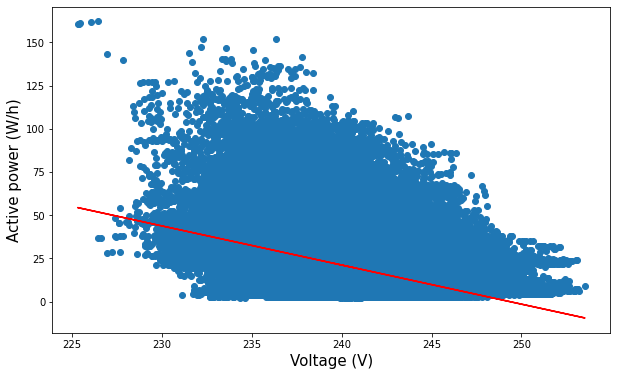

In [86]:
plt.figure(figsize=(10,6))
plt.plot(data_second["Voltage"],relation1(data_second['Voltage'],A2_s,B2_s), '-r')
plt.scatter(data_second["Voltage"],data_second["Global_active_power"])
plt.xlabel(r'Voltage (V)', size='15')
plt.ylabel(r'Active power (W/h)', size='15')
get_fit(relation1, data_second["Voltage"],data_second["Global_active_power"],5)
plt.show()

Ahora observaremos el comportamiento de las variables para la data en días

In [24]:
values2_d,covar2_d=curve_fit(relation1, data_day["Voltage"],data_day["Global_active_power"])
A2_d=values2_d[0]
B2_d=values2_d[1]

Coeficients are : [   0.49434 -101.69424]
Sigma_Coeficients are : [ 0.20628 49.82281]
Error on fit is =5.688045417005188


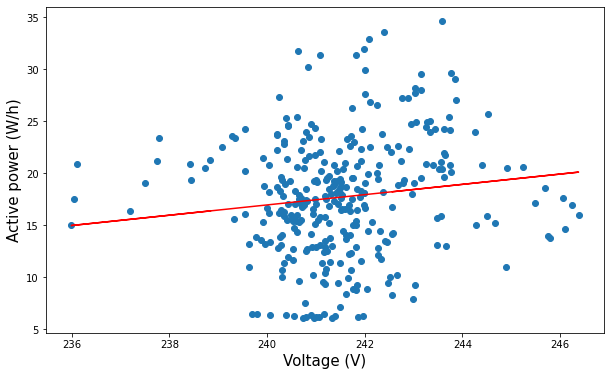

In [85]:
plt.figure(figsize=(10,6))
plt.plot(data_day["Voltage"],relation1(data_day['Voltage'],A2_d,B2_d), '-r')
plt.scatter(data_day["Voltage"],data_day["Global_active_power"])
plt.xlabel(r'Voltage (V)', size='15')
plt.ylabel(r'Active power (W/h)', size='15')
get_fit(relation1, data_day["Voltage"],data_day["Global_active_power"],5)
plt.show()

A continuación observaremos el comportamiento de las variables para la data en meses

In [26]:
values2_m,covar2_m=curve_fit(relation1, data_month["Voltage"],data_month["Global_active_power"])
A2_m=values2_m[0]
B2_m=values2_m[1]

Coeficients are : [   2.88018 -677.84974]
Sigma_Coeficients are : [  0.99917 241.30431]
Error on fit is =1.5753674721327826


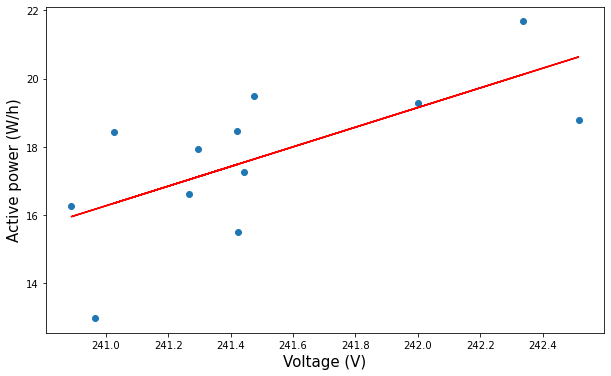

In [84]:
plt.figure(figsize=(10,6))
plt.plot(data_month["Voltage"],relation1(data_month['Voltage'],A2_m,B2_m), '-r')
plt.scatter(data_month["Voltage"],data_month["Global_active_power"])
plt.xlabel(r'Voltage (V)', size='15')
plt.ylabel(r'Active power (W/h)', size='15')
get_fit(relation1, data_month["Voltage"],data_month["Global_active_power"],5)
plt.show()

### $\clubsuit$ Relation 3: Active Power and Intensity & Voltage

Primero tenemos que definir nuestra relación 3, en este caso se tienen 2 variables "x", "y", por tanto, se tratará de un plano de ajuste, mas no una recta. 

In [57]:
def R3(X, a, b, c):  
    x,y = X
    return(a*x+b*y+c)

Se obtienen los parametros de ajuste para los datos de meses, días y para todos.

In [38]:
popt_month_3, pcov_month_3 = curve_fit(R3, (data_month["Global_intensity"], data_month["Voltage"]),data_month["Global_active_power"])
popt_day_3, pcov_day_3 = curve_fit(R3, (data_day["Global_intensity"], data_day["Voltage"]),data_day["Global_active_power"])
popt_3, pcov_3 = curve_fit(R3, (data_second["Global_intensity"], data_second["Voltage"]),data_second["Global_active_power"])

Para el ajuste en R3, se establecen los valores que tomará el meshgrid, este toma los vectores generados y los ajusta en una malla 

In [39]:
month_Global_intensity = [np.min(data_month["Global_intensity"]),np.max(data_month["Global_intensity"]),len(data_month["Global_intensity"])]
month_Voltage = [np.min(data_month["Voltage"]),np.max(data_month["Voltage"]),len(data_month["Voltage"])]

days_Global_intensity = [np.min(data_day["Global_intensity"]),np.max(data_day["Global_intensity"]),len(data_day["Global_intensity"])]
days_Voltage = [np.min(data_day["Voltage"]),np.max(data_day["Voltage"]),len(data_day["Voltage"])]

Global_intensity = [np.min(data_second["Global_intensity"]),np.max(data_second["Global_intensity"]),12]
Voltage = [np.min(data_second["Voltage"]),np.max(data_second["Voltage"]),12]

Ploteamos las gráficas

Coeficients are : [  4.0875    0.13469 -33.15143]
Sigma_Coeficients are : [0.04021 0.04116 9.8236 ]
Error on fit is =0.046471269320371204


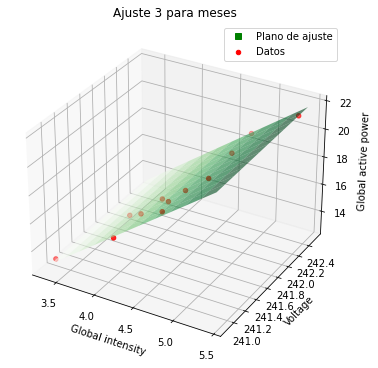

In [81]:
#Para meses
plt.figure(figsize=(6,10))
g=plt.axes(projection='3d')
x1=np.linspace(*month_Global_intensity)
y1=np.linspace(*month_Voltage)
w,z =np.meshgrid(x1,y1)
a= R3((w,z),*popt_month_3) 
S = g.scatter3D(data_month["Global_intensity"],data_month["Voltage"],data_month["Global_active_power"], color = "red")
g.plot_surface(w,z,a,alpha= 0.6,cmap='Greens')
g.set_title("Ajuste 3 para meses")
g.set_xlabel("Global intensity")
g.set_ylabel("Voltage")
g.set_zlabel("Global active power")
legends = mpl.lines.Line2D([0],[0], linestyle="none", color='g', marker = 's') 
g.legend([legends,S], ['Plano de ajuste','Datos'], numpoints = 1)
get_fit(R3,(data_month["Global_intensity"], data_month["Voltage"]),data_month["Global_active_power"],5)
plt.show()


Coeficients are : [  4.03917   0.10288 -25.2543 ]
Sigma_Coeficients are : [0.0079  0.00727 1.75205]
Error on fit is =0.1989837575148547


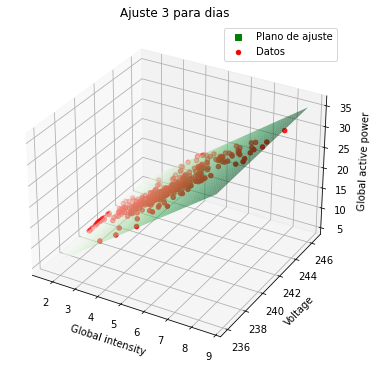

In [82]:
#Para dias
plt.figure(figsize=(6,10))
g=plt.axes(projection='3d')
x2=np.linspace(*days_Global_intensity)
y2=np.linspace(*days_Voltage)
w1,z1 =np.meshgrid(x2,y2)
a1= R3((w1,z1),*popt_day_3) 
S = g.scatter3D(data_day["Global_intensity"],data_day["Voltage"],data_day["Global_active_power"], color = "red")
g.plot_surface(w1,z1,a1,alpha= 0.6,cmap='Greens')
g.set_title("Ajuste 3 para dias")
g.set_xlabel("Global intensity")
g.set_ylabel("Voltage")
g.set_zlabel("Global active power")
legends = mpl.lines.Line2D([0],[0], linestyle="none", color='g', marker = 's') 
g.legend([legends,S], ['Plano de ajuste','Datos'], numpoints = 1)
get_fit(R3,(data_day["Global_intensity"], data_day["Voltage"]),data_day["Global_active_power"],5)
plt.show()


Coeficients are : [  3.99133   0.07782 -18.98635]
Sigma_Coeficients are : [0.00033 0.00046 0.11094]
Error on fit is =0.7960318827891385


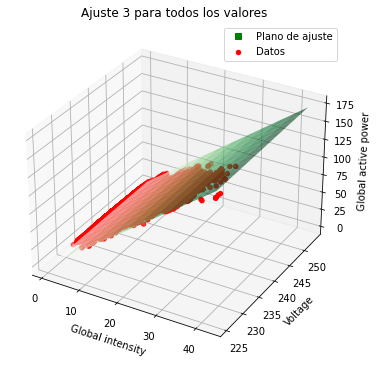

In [83]:
#General
plt.figure(figsize=(6,10))
g=plt.axes(projection='3d')
x3=np.linspace(*Global_intensity)
y3=np.linspace(*Voltage)
w2,z2 =np.meshgrid(x3,y3)
a2= R3((w2,z2),*popt_3) 
S = g.scatter3D(data_second["Global_intensity"],data_second["Voltage"],data_second["Global_active_power"], color = "red")
g.plot_surface(w2,z2,a2,alpha= 0.6,cmap='Greens')
g.set_title("Ajuste 3 para todos los valores")
g.set_xlabel("Global intensity")
g.set_ylabel("Voltage")
g.set_zlabel("Global active power")
legends = mpl.lines.Line2D([0],[0], linestyle="none", color='g', marker = 's') 
g.legend([legends,S], ['Plano de ajuste','Datos'], numpoints = 1)
get_fit(R3,(data_second["Global_intensity"], data_second["Voltage"]),data_second["Global_active_power"],5)
plt.show()

## Punto 5
Diga cual de las relaciones fue la mejor y cual la peor.

### La Peor Relación

Observando el margen de error para los tres casos podemos llegar a la conclusión de que la peor entre las 3 relaciones es la **Relation 2: Active Power and Voltage**, ya que en esta, el margen de error es mayor al **1%**, incluso podemos observar que cuando trabajamos con la data en días, el margen de error es mayor al **14%**.

### La Mejor Relación

Podemos decir que la mejor relación es la **Relation 3: Active Power and Intensity & Voltage**  ya que cuando tomamos la data en meses, el margen de error no llega ni al **0.1%** (a demás de que se ve mejor visualmente).

### Observaciones Adicionales

$\spadesuit$ **-** Los menores margenes de errores se dan cuando tomamos la data en meses en las tres relaciones

$\spadesuit$ **-** Los mayores margenes de errores se dan cuando analizamos el comportamiento de las variables en días

$\spadesuit$ **-** La **Relation 3** al ser en un plano de 3 dimenciones, es la relación que se ve mejor graficamente